In [1]:
import datetime
import pyaurorax
import numpy as np

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools
at.set_theme("dark")

# Generate SMILE ASI montage

Montages are a nice way to visualize a series of individual ASI frames. Montages are simply a series of images displayed as a grid.

Note that montages are included in the automatically-generated summary products available on the Open Data Platform. See [here for SMILE](https://data-portal.phys.ucalgary.ca/archive/smile_asi/montage).

In [2]:
# download an hour of SMILE ASI data
dataset_name = "SMILE_ASI_RAW"
start_dt = datetime.datetime(2025, 1, 1, 9, 0)
end_dt =datetime.datetime(2025, 1, 1, 9, 59)
site_uid = "luck"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

In [3]:
# read in the hour of data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

In [4]:
# scale all the images
#
# NOTE: you can scale all images or just one image
images_scaled = at.scale_intensity(data.data, min=10, max=70)

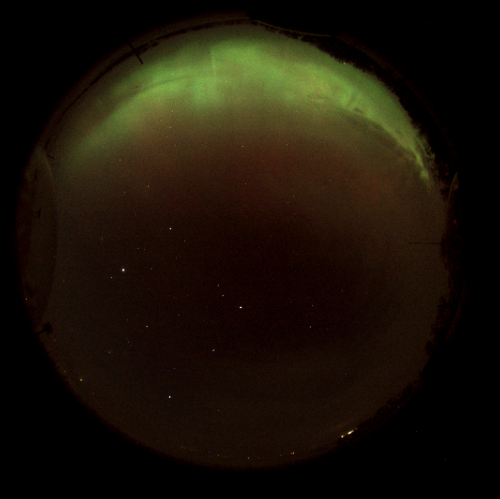

In [5]:
# show the first frame to evaluate our scaling
at.display(images_scaled[:, :, :, 0])

## Generate a montage for 10 frames of data

Let's generate a montage for just the first 10 frames from the hour of data we read in (this equates to 30 seconds of data, since SMILE takes pictures at a 3-second cadence).

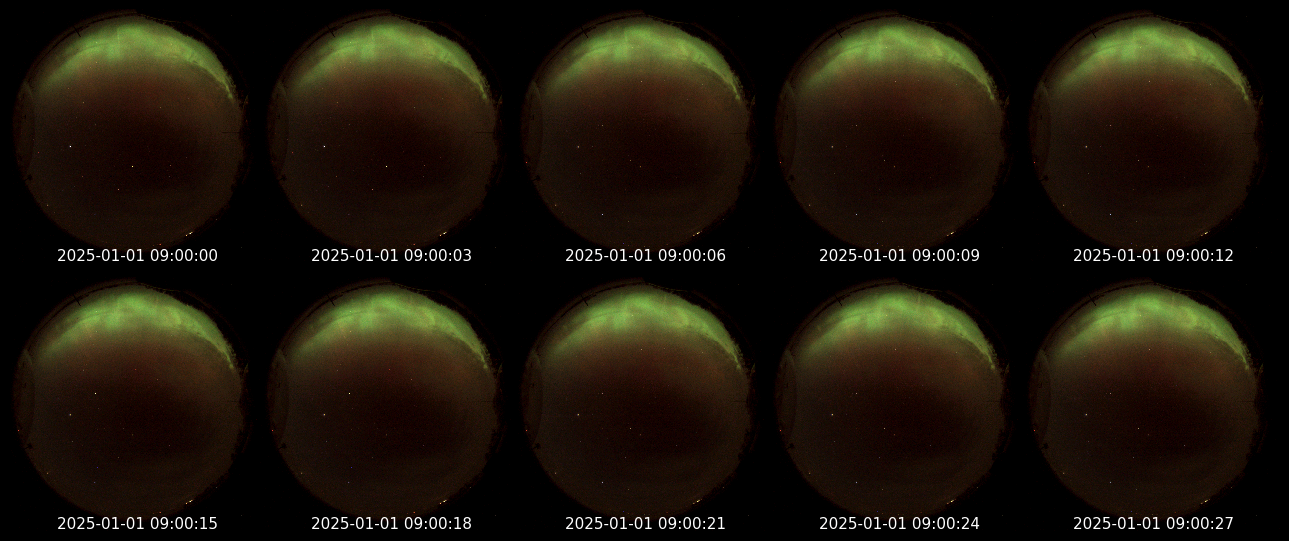

In [6]:
# create the montage
montage = at.montage.create(images_scaled[:, :, :, 0:10], data.timestamp[0:10])

# plot the montage
montage.plot(2, 5, figsize=(13, 6), cmap="gray")

## Generate a montage for an hour of data

Now let's generate a montage for an hour of data. Since SMILE takes pictures at 3-second cadence, showing every image in the hour is quite a few images. So instead, we're going to pluck out the first image of every minute, and then make a montage from that.

In [7]:
# we'll use the first frame of each minute, so let's extract the appropriate data object with that data
first_minute_frames = np.empty((data.data.shape[0], data.data.shape[1], data.data.shape[2], 60), dtype=data.data.dtype)
first_minute_timestamps = []
counter = 0
for i in range(0, len(data.timestamp)):
    if (data.timestamp[i].second == 0):
        # 0-th second frame
        #
        # add to our batch
        first_minute_frames[:, :, :, counter] = data.data[:, :, :, i]
        first_minute_timestamps.append(data.timestamp[i])
        counter += 1

# now that we have our data, let's create a montage object
montage = at.montage.create(first_minute_frames, first_minute_timestamps)
print(montage)

Montage(data=array(dims=(512, 512, 3, 60), dtype=uint8), timestamp=[60 datetime objects])


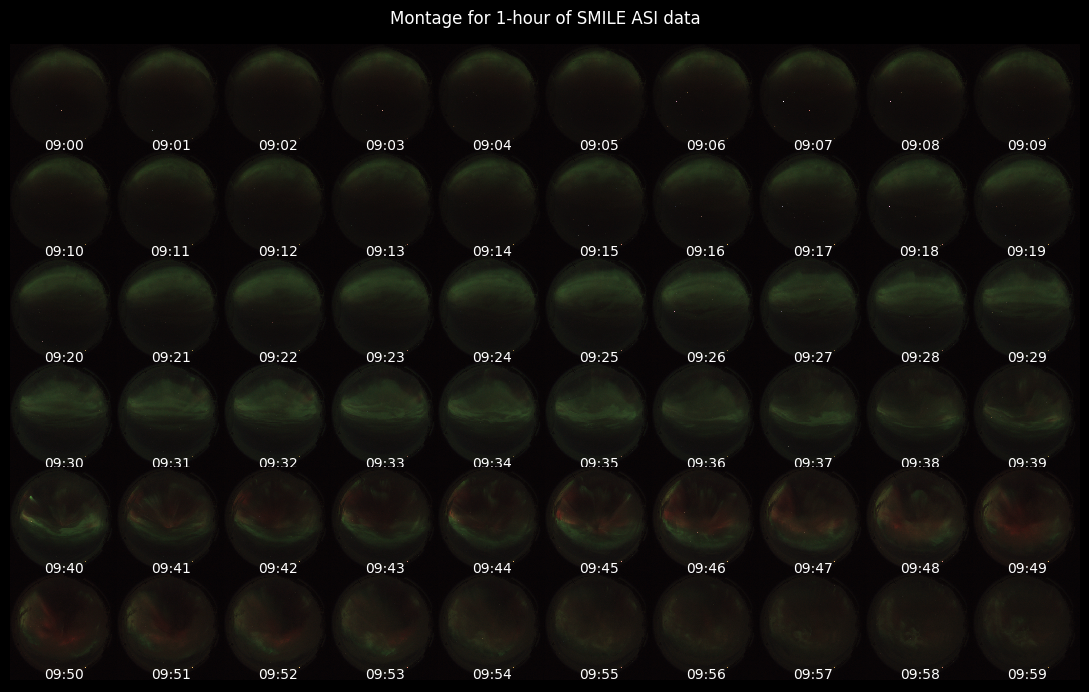

In [8]:
# plot the montage
montage.plot(6, 10, figsize=(11, 7), cmap="gray", timestamps_format="%H:%M", timestamps_fontsize=10, title="Montage for 1-hour of SMILE ASI data")

## A slightly faster way of a 1-hour montage

It is possible to make a 1-hour montage how we did above, a bit faster. We can leverage the `read()` function's `first_frame` parameter. This will make it so that only the first image from each 1-minute file is read in, effectively reducing the amount of data we have loaded and nullifying the need to pluck that frame out ourselves.

In [9]:
# we can leverage the first_record parameter of the read function to do the work for us
# of extracting the first minute's data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5, first_record=True)

# create the montage
montage = at.montage.create(data.data, data.timestamp)

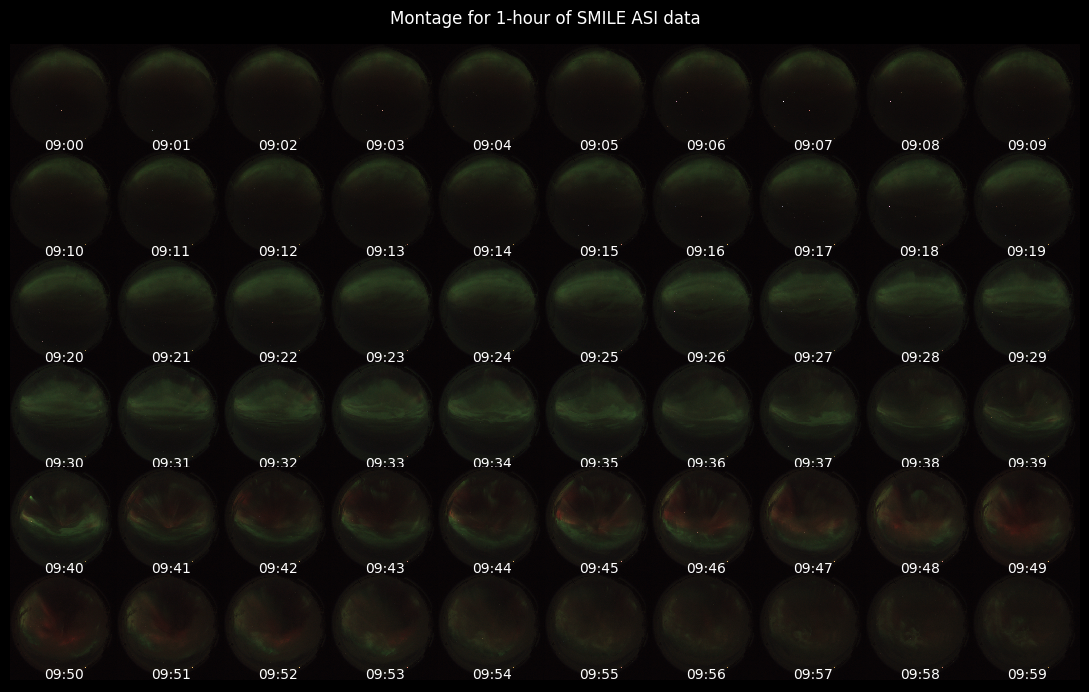

In [10]:
# plot the montage
montage.plot(6, 10, figsize=(11, 7), cmap="gray", timestamps_format="%H:%M", timestamps_fontsize=10, title="Montage for 1-hour of SMILE ASI data")